# evaluation_exercise


In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_digits
digits = load_digits() 
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=0)


In [2]:
import numpy as np 
from sklearn.dummy import DummyClassifier 
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) 
pred_most_frequent = dummy_majority.predict(X_test)
print(" : {}".format(np.unique(pred_most_frequent))) 
print(" : {:.2f}".format(dummy_majority.score(X_test, y_test)))


 : [False]
 : 0.90


In [3]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test) 
print(" : {:.2f}".format(tree.score(X_test, y_test)))


 : 0.92


In [4]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train) 
pred_dummy = dummy.predict(X_test) 
print("dummy : {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train) 
pred_logreg = logreg.predict(X_test) 
print("logreg : {:.2f}".format(logreg.score(X_test, y_test)))


dummy : 0.83
logreg : 0.98


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# (Confusion matrices) 

In [8]:
import mglearn

In [9]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg) 
print(" :\n{}".format(confusion))


 :
[[401   2]
 [  8  39]]


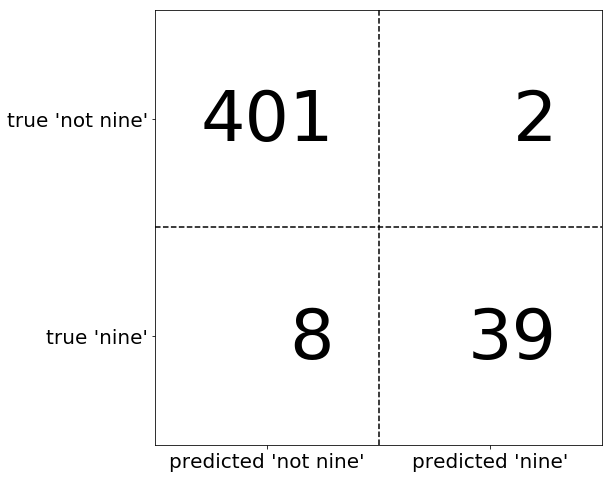

In [10]:
mglearn.plots.plot_confusion_matrix_illustration()

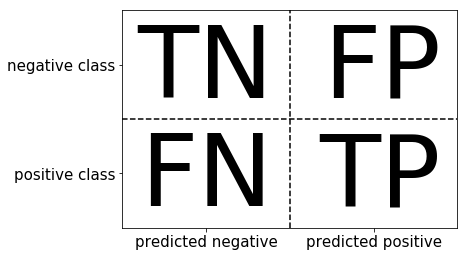

In [11]:
 mglearn.plots.plot_binary_confusion_matrix()


In [13]:
print(" :") 
print(confusion_matrix(y_test, pred_most_frequent)) 
print("\n :") 
print(confusion_matrix(y_test, pred_dummy)) 
print("\n :") 
print(confusion_matrix(y_test, pred_tree)) 
print("\n ") 
print(confusion_matrix(y_test, pred_logreg))


 :
[[403   0]
 [ 47   0]]

 :
[[354  49]
 [ 43   4]]

 :
[[390  13]
 [ 24  23]]

 
[[401   2]
 [  8  39]]


In [15]:
from sklearn.metrics import f1_score 
print(" f1 score: {:.2f}".format( f1_score(y_test, pred_most_frequent))) 
print(" f1 score: {:.2f}".format(f1_score(y_test, pred_dummy))) 
print(" f1 score: {:.2f}".format(f1_score(y_test, pred_tree))) 
print(" f1 score: {:.2f}".format( f1_score(y_test, pred_logreg))) 

 f1 score: 0.00
 f1 score: 0.08
 f1 score: 0.55
 f1 score: 0.89


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred_most_frequent, target_names=["9 ", "9"]))


              precision    recall  f1-score   support

          9        0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
print(classification_report(y_test, pred_dummy, target_names=["9 ", "9"]))


              precision    recall  f1-score   support

          9        0.89      0.88      0.88       403
           9       0.08      0.09      0.08        47

   micro avg       0.80      0.80      0.80       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.80      0.80       450



In [18]:
 print(classification_report(y_test, pred_tree, target_names=["9 ", "9"]))

              precision    recall  f1-score   support

          9        0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

   micro avg       0.92      0.92      0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [19]:
 print(classification_report(y_test, pred_logreg, target_names=["9 ", "9"]))


              precision    recall  f1-score   support

          9        0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [20]:
from sklearn.datasets import make_blobs 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [21]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22) 
print(X, y) 

[[-1.13123317e+01 -1.20918530e+00]
 [ 3.63377400e+00  2.58952562e+00]
 [-2.03502489e+00  3.38227669e+00]
 [-5.91332658e+00  1.25783496e+01]
 [-1.55257743e+01 -9.00101590e+00]
 [-3.27459673e+00  2.05854157e+00]
 [-3.38538661e+00 -5.83864971e+00]
 [-2.40737735e+00  1.35475275e+00]
 [-3.57544439e+00 -5.33265314e+00]
 [-2.80476414e+00 -1.31700661e+00]
 [-1.26992172e+01 -8.87231672e+00]
 [-7.04586997e+00 -3.21313828e+00]
 [ 2.40570228e+00 -5.19551470e+00]
 [-1.01731953e+01 -5.85196829e+00]
 [-5.52518616e+00  3.81125199e+00]
 [-1.03533045e+01  1.99489625e+00]
 [-1.34664801e+00  5.06861451e+00]
 [-2.41046853e+00  6.33209004e+00]
 [ 6.09258713e+00  2.06579987e+00]
 [-8.07561536e+00 -3.70871625e+00]
 [ 1.64358585e+00 -7.06886588e+00]
 [-1.68091223e+00 -1.00768886e+01]
 [-9.27603241e+00  1.17658621e-01]
 [-7.55262603e+00  3.12471356e+00]
 [ 8.49341927e-01  5.96754110e+00]
 [-1.71652375e+00  4.89984429e+00]
 [ 5.59384574e+00 -9.54550755e+00]
 [-5.55877909e+00  8.44258335e+00]
 [ 1.77902916e+00 -1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
svc = SVC(gamma=.05, probability=True) 
svc.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
print(classification_report(y_test, svc.predict(X_test)))
#predict하면 결과값이 1, 0 으로 나옴

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [24]:
print(classification_report(svc.predict(X_test), y_test)) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        96
           1       0.67      0.35      0.46        17

   micro avg       0.88      0.88      0.88       113
   macro avg       0.78      0.66      0.70       113
weighted avg       0.86      0.88      0.86       113



In [25]:
svc.decision_function(X_test) #decision_function 하면 결과값을 출력함
#임계값 0을 기준으로 '+'면 1, '-'면 0이다. 절대값 수치가 강할 수록 0일 경우, 1일 경우의 확률이 큰 것이다.
#만약 조금 더 엄격한 기준을 적용하고 싶다면 0에서 값을 높힌다. 예를 들면 0.5
#조금 더 느슨하게 기준을 적용하고 싶다면 0에서 값을 낮춘다. 예를 들면 -0.8



#지금 모델 성능평가에 대한 수업을 하고 있는데, 성능평가에 대한 엄격한 기준을 설정하기 위해, decision_fumction을 쓴 것이다.

array([-0.99973208, -1.00148617, -1.1386043 , -0.98505482, -1.01044247,
       -1.00027441, -1.00609413,  0.88395198, -1.00467053, -1.00283866,
       -1.00097712,  1.07030762, -1.02076344, -0.40435353, -0.48739733,
       -1.00121046, -1.09560781, -1.44572917, -0.99908802, -1.00070245,
       -0.44364565, -1.01170286, -0.99918954, -1.0861769 , -1.33291363,
       -1.00320657, -0.99076097, -1.09564958,  0.63212214, -0.99238394,
       -1.47090403,  0.19153373,  0.74430046, -1.0084656 , -1.15104651,
       -1.02852903, -1.00840776, -1.23180696, -1.0031964 , -1.00023926,
       -1.0013854 , -1.00003771, -1.10114776, -0.98779744, -1.05818617,
       -1.00105363,  0.5230006 ,  0.97789353, -0.99559099,  0.52008479,
       -1.25711078, -1.08267667, -0.99828696, -1.00385465,  0.08620484,
       -0.99871026, -1.06221884, -1.02415268, -1.08797969, -1.06010122,
        0.36988055, -1.05630237, -0.99981001, -0.24173165, -1.02857919,
       -1.00058106, -0.99968788, -1.00115386, -0.99882791,  1.25

In [26]:
 y_pred_lower_threshold = svc.decision_function(X_test) > -.8 

In [27]:
y_pred_lower_threshold 

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False])

In [28]:
 print(classification_report(y_test, y_pred_lower_threshold)) 

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [29]:
 y_pred_lower_threshold = svc.decision_function(X_test) > 1 

In [30]:
y_pred_lower_threshold

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [31]:
print(classification_report(y_test, y_pred_lower_threshold)) 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.50      0.22      0.31         9

   micro avg       0.92      0.92      0.92       113
   macro avg       0.72      0.60      0.63       113
weighted avg       0.90      0.92      0.91       113



In [32]:
svc.predict_proba(X_test) 

array([[0.94678406, 0.05321594],
       [0.94700601, 0.05299399],
       [0.96185451, 0.03814549],
       [0.94489185, 0.05510815],
       [0.94812557, 0.05187443],
       [0.94685278, 0.05314722],
       [0.94758487, 0.05241513],
       [0.15718763, 0.84281237],
       [0.94740668, 0.05259332],
       [0.94717654, 0.05282346],
       [0.94694169, 0.05305831],
       [0.10572266, 0.89427734],
       [0.94938768, 0.05061232],
       [0.81258397, 0.18741603],
       [0.84152795, 0.15847205],
       [0.94697118, 0.05302882],
       [0.95769598, 0.04230402],
       [0.98188491, 0.01811509],
       [0.94670234, 0.05329766],
       [0.94690695, 0.05309305],
       [0.82675771, 0.17324229],
       [0.9482813 , 0.0517187 ],
       [0.94671523, 0.05328477],
       [0.95672663, 0.04327337],
       [0.97616728, 0.02383272],
       [0.94722284, 0.05277716],
       [0.94563498, 0.05436502],
       [0.95770022, 0.04229978],
       [0.25660287, 0.74339713],
       [0.9458446 , 0.0541554 ],
       [0.

In [33]:
 y_pred_threshold = svc.predict_proba(X_test)>0.8 

In [35]:
import numpy as np 
y_pred_threshold = y_pred_threshold.argmax(axis=1) 

In [36]:
 print(classification_report(y_test, y_pred_threshold))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       104
           1       0.50      0.44      0.47         9

   micro avg       0.92      0.92      0.92       113
   macro avg       0.73      0.70      0.71       113
weighted avg       0.92      0.92      0.92       113



# - 정밀도 재현율 곡선 ROC 

In [37]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve( y_test, svc.decision_function(X_test)) 
print(thresholds) 

[-0.7512563  -0.58749402 -0.48739733 -0.44364565 -0.40435353 -0.28965335
 -0.24173165 -0.19257469 -0.17852475 -0.16644845 -0.1601932   0.08620484
  0.14630375  0.19153373  0.36988055  0.52008479  0.5230006   0.53195462
  0.63212214  0.74430046  0.87212596  0.88002558  0.88395198  0.97789353
  1.00010384  1.07030762  1.08436417  1.25059991]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


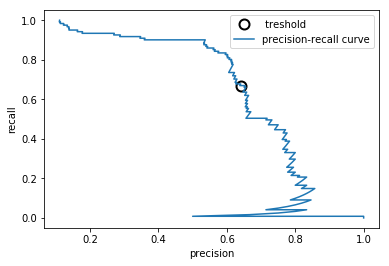

In [40]:
import matplotlib.pyplot as plt # 
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve( y_test, svc.decision_function(X_test))
# 0 - predict 
close_zero = np.argmin(np.abs(thresholds)) 
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label=" treshold", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision-recall curve") 
plt.xlabel("precision") 
plt.ylabel("recall") 
plt.legend(loc="best") 